(-0.5, 1279.5, 719.5, -0.5)

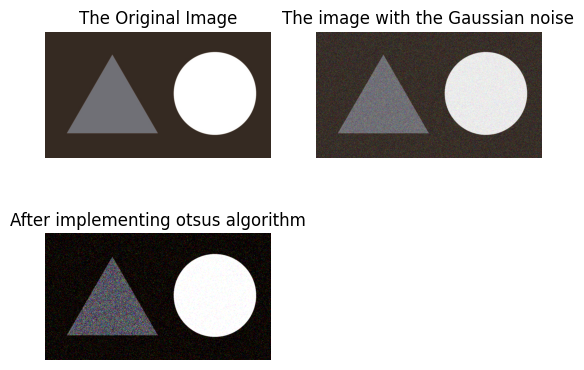

In [ ]:

import numpy as np
import cv2
from queue import Queue
import matplotlib.pyplot as plt


image = cv2.imread('image3.jpg')

def gaussian_filter(image, mean=0, sigma=10):
    gauss = np.random.normal(mean, sigma, image.shape)
    image_noise = image + gauss
    image_noise = np.clip(image_noise, 0, 255)
    return image_noise.astype(np.uint8)

# Add Gaussian noise
image_noise = gaussian_filter(image, mean=0, sigma=50)

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('The Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(image_noise, cmap='gray')
plt.title('The image with the Gaussian noise')
plt.axis('off')


# Implementing histogram of image
histogram, bin_edges = np.histogram(image_noise, bins=256, range=(0, 255))
# Implementing probability mass function of image
prob = histogram / float(np.sum(histogram))

best_threshold = 0
best_variance = 0
total_mean = np.mean(image_noise)

# Iterating through possible threshold values
for t in range(int(np.min(image_noise)), int(np.max(image_noise)) + 1):


 prob_f = np.sum(prob[:t])
 prob_b = np.sum(prob[t:])

 if prob_f == 0 or prob_b == 0:continue
 # Implementing means of foreground and background classes
 mean_f = np.sum(prob[:t] * np.arange(t)) / prob_f
 mean_b = np.sum(prob[t:] * np.arange(t, 256)) / prob_b

 #Implementing variance between foreground and background classes
 variance = prob_f * prob_b * (mean_f - mean_b) ** 2
 # Taking best threshold and variance
 if variance > best_variance:
   best_threshold = t
   best_variance = variance

output = cv2.threshold(image_noise, best_threshold, 255,
cv2.THRESH_BINARY)[1]


plt.subplot(2, 2, 3)
plt.imshow(output, cmap='gray')
plt.title('After implementing otsus algorithm')
plt.axis('off')


